# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [57]:
data = pd.read_csv('Fraud_check.csv')

In [58]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [59]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [60]:
data=data.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},axis=1)

In [61]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [62]:
d=[]

In [63]:
for i in data['Taxable_Income']:
  if i <= 30000 :
    d.append(0)
  else:
    d.append(1)

# assighning RISKY as '0' and good as '1'

In [64]:
data['Taxable_Income']=d

In [65]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [66]:
data1 = pd.get_dummies(data,columns=['Undergrad','Urban'],drop_first=True)

In [67]:
data1.head()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES
0,Single,1,50047,10,0,1
1,Divorced,1,134075,18,1,1
2,Married,1,160205,30,0,1
3,Single,1,193264,15,1,1
4,Married,1,27533,28,0,0


In [68]:
data1 = pd.get_dummies(data1,columns=['Marital_Status'])

In [69]:
data1.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,50047,10,0,1,0,0,1
1,1,134075,18,1,1,1,0,0
2,1,160205,30,0,1,0,1,0
3,1,193264,15,1,1,0,0,1
4,1,27533,28,0,0,0,1,0


In [70]:
x = data1.iloc[:,1:]
y=data1[['Taxable_Income']]

In [72]:
x.head()

,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,50047,10,0,1,0,0,1
1,134075,18,1,1,1,0,0
2,160205,30,0,1,0,1,0
3,193264,15,1,1,0,0,1
4,27533,28,0,0,0,1,0


In [73]:
y.head()

,Taxable_Income
0,1
1,1
2,1
3,1
4,1


In [74]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [75]:
model = RandomForestClassifier(n_estimators=100, max_features=3,random_state=8)

In [76]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

In [77]:
pred=model.predict(x_test)

In [78]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [79]:
pred=pd.Series(pred)

In [80]:
pred.value_counts()

1    112
0      8
dtype: int64

In [81]:
feature_imp = model.feature_importances_
feature_imp

array([0.52875773, 0.32139741, 0.03863692, 0.04878458, 0.01707714,
       0.0266212 , 0.01872501])

In [82]:
imp_df = pd.DataFrame(feature_imp,columns=['importance'])
imp_df['features'] = x.columns
imp_df

,importance,features
0,0.528758,City_Population
1,0.321397,Work_Experience
2,0.038637,Undergrad_YES
3,0.048785,Urban_YES
4,0.017077,Marital_Status_Divorced
5,0.026621,Marital_Status_Married
6,0.018725,Marital_Status_Single


<BarContainer object of 7 artists>

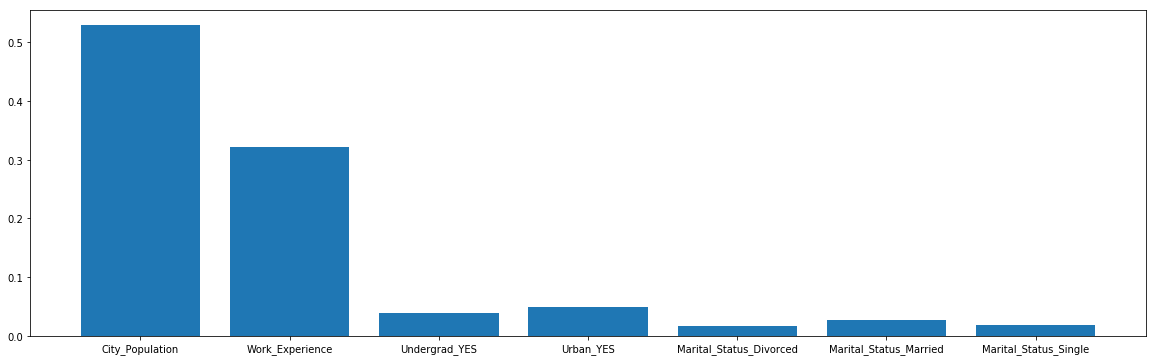

In [83]:
plt.figure(figsize=(20,6))
plt.bar(imp_df['features'],imp_df['importance'])